In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

import datetime as dt
import mplfinance as mpf

import time

import os
from os import listdir
from os.path import isfile, join

import statsmodels.api as sm
import seaborn as sns

from statsmodels.tsa.ar_model import AutoReg, ar_select_order

In [2]:
#Some Defatult Values
PATH = "C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data/"
S_YEAR = 2017
S_MONTH = 1
S_DAY = 3
S_DATE_STR = f"{S_YEAR}-{S_MONTH}-{S_DAY}"
S_DATE_DATETIME = dt.datetime(S_YEAR,S_MONTH, S_DAY)

E_YEAR = 2021
E_MONTH = 8
E_DAY = 19
E_DATE_STR = f"{E_YEAR}-{E_MONTH}-{E_DAY}"
E_DATE_DATETIME = dt.datetime(E_YEAR,E_MONTH, E_DAY)

risk_free_rate = 0.0125 #10Y bond rate


In [3]:
files = [x for x in listdir(PATH) if isfile(join(PATH, x))]
tickers = [os.path.splitext(x)[0] for x in files]

tickers.sort()
len(tickers)

2674

In [4]:
#save stocks to csv
def save_to_csv_from_yahoo(ticker, syear, smonth, sday, eyear, emonth, eday):
    start = dt.datetime(syear, smonth, sday)
    end = dt.datetime(eyear, emonth, eday)

    try:
        print("Get Data for :", ticker)
        df = yf.download(ticker, start=start, end=end)['Adj Close']
        time.sleep(0)
        df.to_csv('C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data Updated/' + ticker + '.csv')

    except Exception as ex:
        stocks_not_downloaded.append(ticker)
        print("Could not download data for: "+ticker)

#function that returns df from csv
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(PATH + ticker + '.csv', index_col='Date', parse_dates=True)

    except FileNotFoundError:
        print("File Does Not Exist")
        pass

    else:
        return df



def update_stock_data(ticker):
    up_folder = 'C:/Users/dietd/Untitled Folder/Python for Finance/Financial Data/Stock Data Updated/'

    stock_folder = PATH

    update_df = get_df_from_csv(up_folder, ticker)
    update_df

    original_df = get_df_from_csv(stock_folder, ticker)

    #drop unnamed column
    original_df.drop(original_df.columns[original_df.columns.str.contains('unnamed', case = False)], axis=1, inplace=True)

    #drop daily return column
    original_df = original_df.drop('Daily_Return', axis=1)

    join_df = pd.concat([original_df, update_df])

    return join_df

In [5]:
def save_dataframe_to_csv(df, folder, ticker):
    df.to_csv(folder + ticker + '.csv')


def update_stocks(stock_folder):
    for x in tickers:
        try:
            print('Working on ', x)
            new_df = update_stock_data(x)
            save_dataframe_to_csv(new_df, stock_folder, x)

        except Exception as ex:
            print(ex) #prints the error type

In [6]:
#merge multiple stock in one df by column name
def merge_df_by_column_name(col_name, sdate, edate, *tick_args):
    mult_df = pd.DataFrame()
    #print(tick_args[0])
    for x in tick_args:
        #print(x)
        df = get_df_from_csv(x)
        #df['Date']=pd.to_datetime(df['Date'])
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x] = df.loc[mask][col_name]
    
    return mult_df
        

In [7]:
#Markowits Portfolio Optimization
#Optimizing return while minimizing risk
#Use uncorrelated stocks

#Most promising stocks from each sector
port_list = ["GNRC", "DXCM", "AMD", "NFLX", "COST", "TGT", "AES", "MSCI", "NEM", "AMT", "HES"]

In [8]:
mult_df = merge_df_by_column_name('Adj Close', '2018-01-01', '2021-09-01', *port_list)

mult_df

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
Date,,,,,,,,,,,
2018-01-02,48.029999,14.497500,10.980000,201.070007,175.129333,59.278301,9.160440,120.956520,32.197220,125.264259,43.745827
2018-01-03,49.730000,14.520000,11.550000,205.050003,177.231003,58.875126,9.152023,122.794365,31.927210,125.752434,45.162880
2018-01-04,50.070000,13.062500,12.120000,205.630005,175.854721,57.718132,9.118344,124.726936,32.281582,123.915108,46.250813
2018-01-05,50.410000,13.315000,11.880000,209.990005,174.599289,58.331673,9.152023,126.024811,32.399715,124.713951,47.686153
2018-01-08,49.529999,13.860000,12.280000,212.050003,175.278122,58.883877,9.152023,126.195297,32.365963,126.045311,47.987846
...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,427.470001,129.264999,107.269997,550.119995,443.902740,239.833084,22.770163,613.604065,52.330681,269.074615,65.672783
2021-08-27,437.109985,130.177505,111.400002,558.919983,444.920349,240.045013,23.075418,619.190369,53.772240,271.279053,68.059990
2021-08-30,442.700012,130.384995,111.320000,566.179993,450.443024,240.218414,22.989565,627.884399,53.143867,277.151184,67.309731


<Axes: xlabel='Date'>

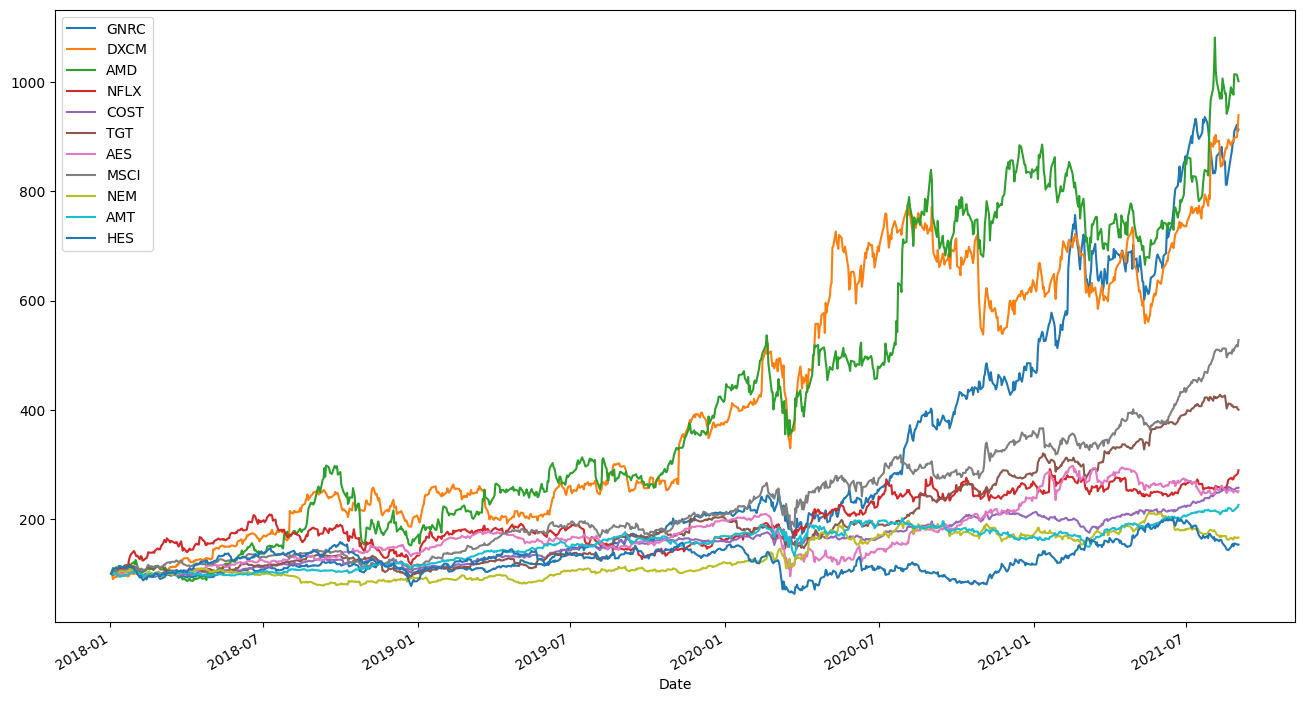

In [9]:
#Plot growth of investments
(mult_df / mult_df.iloc[0] * 100).plot(figsize=(16,9))

In [10]:
returns = np.log(mult_df / mult_df.shift(1))
mean_returns = returns.mean() * 252
mean_returns

GNRC    0.604585
DXCM    0.612335
AMD     0.629813
NFLX    0.290521
COST    0.258560
TGT     0.379159
AES     0.251720
MSCI    0.454712
NEM     0.138719
AMT     0.222875
HES     0.116705
dtype: float64

In [11]:
returns.cov() * 252

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,0.158401,0.060093,0.086753,0.051811,0.036249,0.041736,0.065567,0.068105,0.025417,0.042728,0.080426
DXCM,0.060093,0.235217,0.093342,0.064466,0.029388,0.030274,0.043783,0.080873,0.021016,0.037071,0.057491
AMD,0.086753,0.093342,0.312689,0.102435,0.047315,0.057851,0.055249,0.094915,0.035429,0.041165,0.083068
NFLX,0.051811,0.064466,0.102435,0.169629,0.038811,0.031750,0.032497,0.064262,0.014211,0.030983,0.043144
COST,0.036249,0.029388,0.047315,0.038811,0.048775,0.034117,0.025723,0.036667,0.013165,0.030300,0.024974
TGT,0.041736,0.030274,0.057851,0.031750,0.034117,0.097764,0.038342,0.034675,0.009394,0.028656,0.040758
AES,0.065567,0.043783,0.055249,0.032497,0.025723,0.038342,0.144149,0.062129,0.021930,0.042260,0.093299
MSCI,0.068105,0.080873,0.094915,0.064262,0.036667,0.034675,0.062129,0.121945,0.026375,0.047500,0.069496
NEM,0.025417,0.021016,0.035429,0.014211,0.013165,0.009394,0.021930,0.026375,0.107192,0.020780,0.029879
AMT,0.042728,0.037071,0.041165,0.030983,0.030300,0.028656,0.042260,0.047500,0.020780,0.080782,0.037918


In [12]:
returns.corr()

,GNRC,DXCM,AMD,NFLX,COST,TGT,AES,MSCI,NEM,AMT,HES
GNRC,1.000000,0.311323,0.389807,0.316079,0.412406,0.335387,0.433908,0.490021,0.195062,0.377725,0.372127
DXCM,0.311323,1.000000,0.344182,0.322736,0.274372,0.199642,0.237777,0.477513,0.132355,0.268929,0.218291
AMD,0.389807,0.344182,1.000000,0.444777,0.383128,0.330878,0.260232,0.486069,0.193516,0.259010,0.273558
NFLX,0.316079,0.322736,0.444777,1.000000,0.426688,0.246547,0.207823,0.446812,0.105388,0.264681,0.192904
COST,0.412406,0.274372,0.383128,0.426688,1.000000,0.494066,0.306777,0.475446,0.182067,0.482709,0.208236
TGT,0.335387,0.199642,0.330878,0.246547,0.494066,1.000000,0.322984,0.317576,0.091767,0.322455,0.240048
AES,0.433908,0.237777,0.260232,0.207823,0.306777,0.322984,1.000000,0.468605,0.176423,0.391617,0.452525
MSCI,0.490021,0.477513,0.486069,0.446812,0.475446,0.317576,0.468605,1.000000,0.230694,0.478579,0.366479
NEM,0.195062,0.132355,0.193516,0.105388,0.182067,0.091767,0.176423,0.230694,1.000000,0.223306,0.168056
AMT,0.377725,0.268929,0.259010,0.264681,0.482709,0.322455,0.391617,0.478579,0.223306,1.000000,0.245677


In [13]:
#Generate random weights equal total to 1
weights = np.random.random(len(port_list))
weights /= np.sum(weights)
print('Weights: ', weights)
print('Total Weights: ', np.sum(weights))

Weights:  [0.09155073 0.10132249 0.094298   0.01133706 0.16930459 0.07970849
 0.03809688 0.03217019 0.04044253 0.16691223 0.1748568 ]
Total Weights:  1.0


In [14]:
#Calculate portfolio return
np.sum(weights * mean_returns) * 252

86.0605378984697

In [15]:
#Calculate volatility of random portfolio
np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

0.2441533637757816

In [23]:
#Analyze returns and risk of 10000 random combinations
p_ret = []
p_vol = []
p_SR = []
p_wt = []

n_combinations = 10000

print('Number of assets in portfolio: ', len(port_list))
print('Number of random combinations tried with these assets: ', n_combinations)

for x in range(n_combinations):
    p_weights = np.random.random(len(port_list))
    p_weights /= np.sum(p_weights)

    ret_1 = np.sum(p_weights * returns.mean()) * 252
    p_ret.append(ret_1)
    
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov() * 252, p_weights)))
    #print("Vol_1: ", vol_1)
    p_vol.append(vol_1)

    SR_1 = (ret_1 - risk_free_rate)/vol_1
    p_SR.append(SR_1)
    
    p_wt.append(p_weights)

p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_SR)
p_wt = np.array(p_wt)

display(p_ret, p_vol, p_SR, p_wt)

Number of assets in portfolio:  11
Number of random combinations tried with these assets:  10000


array([0.33907426, 0.33942407, 0.29988595, ..., 0.42000923, 0.38613104,
       0.24556242])

array([0.2320179 , 0.24702832, 0.22780181, ..., 0.26340936, 0.25691309,
       0.22616803])

array([1.40753908, 1.32342749, 1.26156131, ..., 1.54705676, 1.45430908,
       1.03048349])

array([[0.13961935, 0.10331059, 0.00989455, ..., 0.13433607, 0.07990338,
        0.10214719],
       [0.02710181, 0.03236552, 0.13542831, ..., 0.08236929, 0.12723698,
        0.08784662],
       [0.03461823, 0.01041653, 0.08604233, ..., 0.13731984, 0.12191743,
        0.1157877 ],
       ...,
       [0.09074035, 0.09454559, 0.14978124, ..., 0.00397261, 0.01451957,
        0.02115739],
       [0.14065499, 0.12702136, 0.09329117, ..., 0.13343529, 0.00224575,
        0.05475121],
       [0.00469815, 0.00106852, 0.08282392, ..., 0.18391366, 0.14728158,
        0.18668026]])

,Return,Vol
0,0.339074,0.232018
1,0.339424,0.247028
2,0.299886,0.227802
3,0.314313,0.249941
4,0.364722,0.258454
...,...,...
9995,0.371129,0.261667
9996,0.314269,0.223438
9997,0.420009,0.263409
9998,0.386131,0.256913


<Axes: xlabel='Vol', ylabel='Return'>

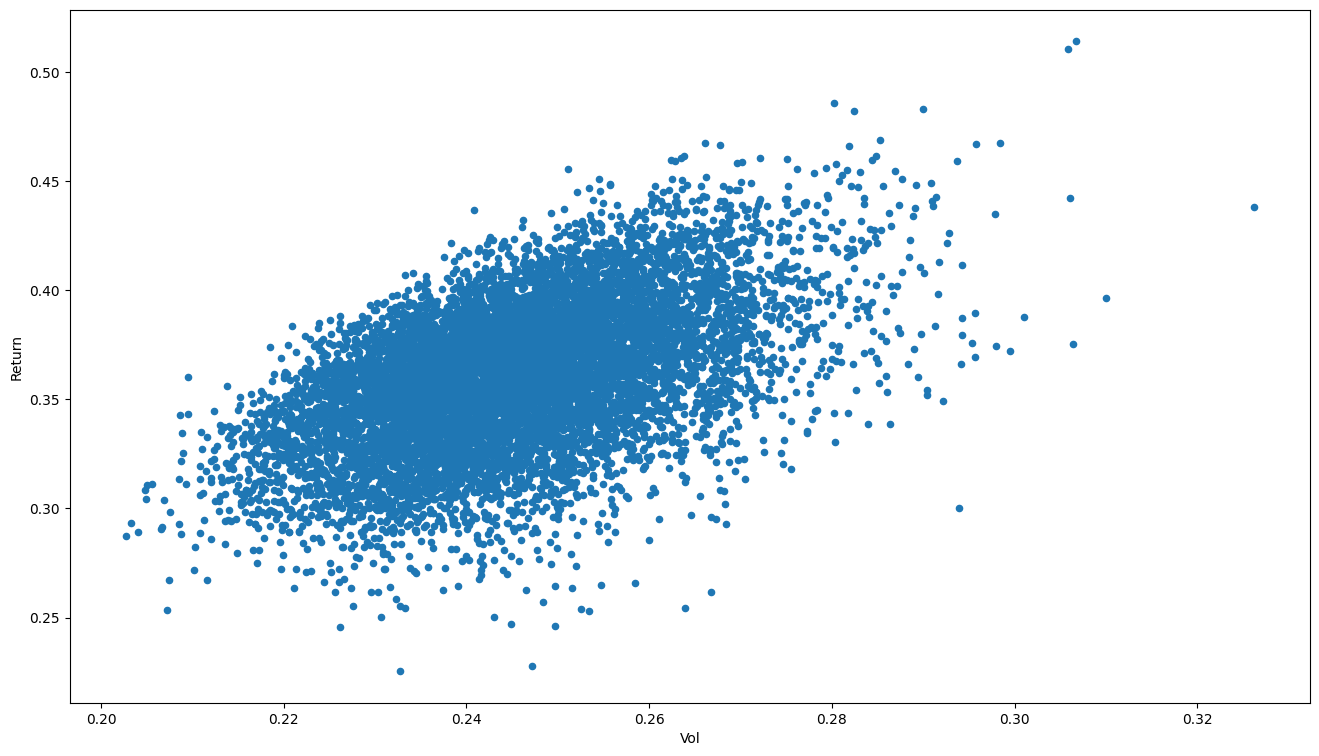

In [24]:
#Plot Efficient Frontier
ports = pd.DataFrame({'Return':p_ret, 'Vol':p_vol})
display(ports)
ports.plot(x='Vol', y='Return', kind='scatter', figsize=(16,9))

In [19]:
print(np.size(p_ret),p_ret.T.shape)

10000 (10000,)
